In [123]:
import cv2
import numpy as np
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

image = cv2.imread('C:/Users/Vaishnav/Desktop/a.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, kernel)

thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

blur = cv2.GaussianBlur(thresh, (3,3), 0)
invert = 255 - blur
data1 = pytesseract.image_to_string(image, lang='eng',config='--psm 6')
data2 = pytesseract.image_to_string(gray, lang='eng',config='--psm 6')
data3 = pytesseract.image_to_string(kernel, lang='eng',config='--psm 6')
data4 = pytesseract.image_to_string(sharpen, lang='eng',config='--psm 6')
data5 = pytesseract.image_to_string(invert, lang='eng',config='--psm 6')
print(data5)

cv2.imshow('sharpen', sharpen)

cv2.waitKey()
cv2.destroyallwindows()

Patients with Patients with

Spontaneous Secondary Control

Thrombosis Thrombosis Subjects
Characteristic (N=153) (N=146) — (N=150)
Age—yr 67.016.7 65.82174 — 65.4415.7
Male sex —no. (96) 71 (464) 65 (44.5) 68 (45.3)
Smoker — no. (96) 40 (26.1) 49 (33.6) 45 (30.0)
Hypertension —no. (96) 46 (30.1) 37 (25.3) 46 (30.7)
Hyperlipidemia — no. (9) 25 (16.3) 171.6) 25 (16.7)
Obesity — no. (96) 117.2) 12 8.2) 16 (10.7)
Diabetes — no. (36) 16 (10.5) 12 8.2) 18 (12.0)
Screened for thrombophilia 68 (44.4) 64 (43.8) -

—no. (%)

‘Thrombophilia — no. 25} 1st -



AttributeError: module 'cv2.cv2' has no attribute 'destroyallwindows'

In [16]:
import pytesseract
from pytesseract import Output
import cv2
img = cv2.imread('a1.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
bbox_list =[]
bboxtxt_list=[]
for i in range(n_boxes):
    if(d['text'][i] != ""):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        bbox = (x, y, w, h)
        bbox_list.append(bbox)
        bboxtxt_list.append(d['text'][i])
        print(d['text'][i])
print(bbox_list)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Patients
with
Patients
with
Spontaneous
Secondary
—Control
Thrombosis
Thrombosis
Subjects
Characteristic
(N=153)
(N=146)
—
(N=150)
[(216, 12, 50, 11), (270, 11, 26, 12), (328, 12, 49, 11), (380, 11, 27, 12), (215, 30, 82, 14), (335, 28, 66, 16), (440, 28, 46, 12), (218, 45, 75, 12), (330, 45, 75, 12), (437, 45, 52, 16), (1, 55, 95, 29), (229, 55, 54, 29), (341, 64, 54, 14), (404, 55, 25, 29), (437, 63, 53, 15)]


In [17]:
left=[]
top=[]
width=[]
height=[]
for i in range(len(bbox_list)):
        left.append(bbox_list[i][0])
        top.append(bbox_list[i][1])
        width.append(bbox_list[i][2])
        height.append(bbox_list[i][3])

In [18]:
print(left)
print(top)
print(bboxtxt_list)

[216, 270, 328, 380, 215, 335, 440, 218, 330, 437, 1, 229, 341, 404, 437]
[12, 11, 12, 11, 30, 28, 28, 45, 45, 45, 55, 55, 64, 55, 63]
['Patients', 'with', 'Patients', 'with', 'Spontaneous', 'Secondary', '—Control', 'Thrombosis', 'Thrombosis', 'Subjects', 'Characteristic', '(N=153)', '(N=146)', '—', '(N=150)']


In [57]:
res = {[left[i],bboxtxt_list[i]] for i in range(len(left))}

In [82]:
import collections
pk ={1:[],2:[],3:[],4:[]}
od = {k: v for k, v in sorted(res.items(), key=lambda item: item[1][0])}
print(od)
for k in od.keys():
    if(od[k][0]>0 and od[k][0]<=100):
        pk[1].append(od[k][1])
    elif(od[k][0]>100 and od[k][0]<=300):
        pk[2].append(od[k][1])
    elif(od[k][0]>300 and od[k][0]<=400):
        pk[3].append(od[k][1])
    elif(od[k][0]>400):
        pk[4].append(od[k][1])
        
pk     

{10: [1, 'Characteristic'], 4: [215, 'Spontaneous'], 0: [216, 'Patients'], 7: [218, 'Thrombosis'], 11: [229, '(N=153)'], 1: [270, 'with'], 2: [328, 'Patients'], 8: [330, 'Thrombosis'], 5: [335, 'Secondary'], 12: [341, '(N=146)'], 3: [380, 'with'], 13: [404, '—'], 9: [437, 'Subjects'], 14: [437, '(N=150)'], 6: [440, '—Control']}


{1: ['Characteristic'],
 2: ['Spontaneous', 'Patients', 'Thrombosis', '(N=153)', 'with'],
 3: ['Patients', 'Thrombosis', 'Secondary', '(N=146)', 'with'],
 4: ['—', 'Subjects', '(N=150)', '—Control']}

In [93]:
res1 = {i: [top[i], bboxtxt_list[i]] for i in range(len(top))}
pk1={"line1":[],"line2":[],"line3":[],"line4":[]}
od1={k: v for k, v in sorted(res1.items(), key=lambda item: item[1])}
for k in od1.keys():
    if(od1[k][0]> 10 and od1[k][0]<=20):
        pk1["line1"].append(od1[k][1])
    elif(od1[k][0]> 20 and od1[k][0]<=30):
        pk1["line2"].append(od1[k][1])
    elif(od1[k][0]> 30 and od1[k][0]<=50):
        pk1["line3"].append(od1[k][1])
    elif(od1[k][0]> 50):
        pk1["line4"].append(od1[k][1])
print(pk1)
 
        

{'line1': ['with', 'with', 'Patients', 'Patients'], 'line2': ['Secondary', '—Control', 'Spontaneous'], 'line3': ['Subjects', 'Thrombosis', 'Thrombosis'], 'line4': ['(N=153)', 'Characteristic', '—', '(N=150)', '(N=146)']}


[216 270 328 380 215 335 440 218 330 437   1 229 341 404 437  12  11  12
  11  30  28  28  45  45  45  55  55  64  55  63]
[[216]
 [270]
 [328]
 [380]
 [215]
 [335]
 [440]
 [218]
 [330]
 [437]
 [  1]
 [229]
 [341]
 [404]
 [437]
 [ 12]
 [ 11]
 [ 12]
 [ 11]
 [ 30]
 [ 28]
 [ 28]
 [ 45]
 [ 45]
 [ 45]
 [ 55]
 [ 55]
 [ 64]
 [ 55]
 [ 63]]
[[216.]
 [270.]
 [328.]
 [380.]
 [215.]
 [335.]
 [440.]
 [218.]
 [330.]
 [437.]
 [  1.]
 [229.]
 [341.]
 [404.]
 [437.]
 [ 12.]
 [ 11.]
 [ 12.]
 [ 11.]
 [ 30.]
 [ 28.]
 [ 28.]
 [ 45.]
 [ 45.]
 [ 45.]
 [ 55.]
 [ 55.]
 [ 64.]
 [ 55.]
 [ 63.]]


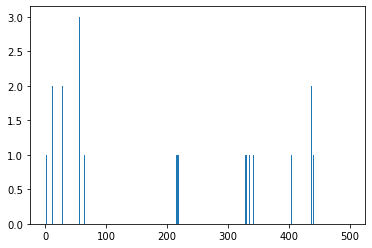

((array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,

In [113]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
x = left
y = top
z = np.hstack((x,y))
print(z)
z = z.reshape((30,1))
print(z)
z = np.float32(z)
print(z)
plt.hist(z,500,[0,500]),plt.show()


In [119]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 1.0)
# Set flags (Just to avoid line break in the code)
flags = cv.KMEANS_RANDOM_CENTERS
# Apply KMeans
compactness,labels,centers = cv.kmeans(z,2,None,criteria,10,flags)
print(compactness,labels,centers)

102189.71349942684 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]] [[327.14288]
 [ 35.     ]]


In [120]:
A = z[labels==0]
B = z[labels==1]

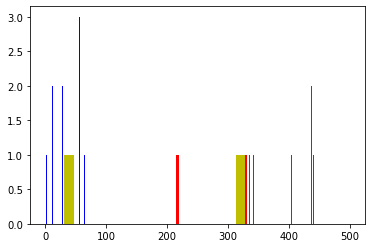

In [121]:
# Now plot 'A' in red, 'B' in blue, 'centers' in yellow
plt.hist(A,500,[0,500],color = 'r')
plt.hist(B,500,[0,500],color = 'b')
plt.hist(centers,32,[0,500],color = 'y')
plt.show()

In [122]:
print(pk)

{1: ['Characteristic'], 2: ['Spontaneous', 'Patients', 'Thrombosis', '(N=153)', 'with'], 3: ['Patients', 'Thrombosis', 'Secondary', '(N=146)', 'with'], 4: ['—', 'Subjects', '(N=150)', '—Control']}
